In [2]:
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
%config Completer.use_jedi = False

Part 1) Image resampling 
a)

In [3]:
# load data and check the meta data
img = sitk.ReadImage("C:\\Users\\User\\Documents\\masters-queens\\BMIF804\\assignment 2\\intraop_mri_new.nrrd")

In [4]:
print('size: ',img.GetSize())
print('origin: ',img.GetOrigin())
print('spacing: ',img.GetSpacing())
print('direction: ',img.GetDirection())
print('pixel type: ',img.GetPixelIDTypeAsString())



size:  (140, 280, 45)
origin:  (-140.0, -139.5, -90.0)
spacing:  (2.0, 1.0, 4.0)
direction:  (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
pixel type:  32-bit signed integer


In [5]:
# set Slicer as external viewer
external_viewer = sitk.ImageViewer()
slicer_app_location = "C:\\Users\\User\\AppData\\Local\\NA-MIC\\Slicer 5.0.3\\Slicer.exe"
external_viewer.SetApplication(slicer_app_location)

external_viewer.Execute(img)

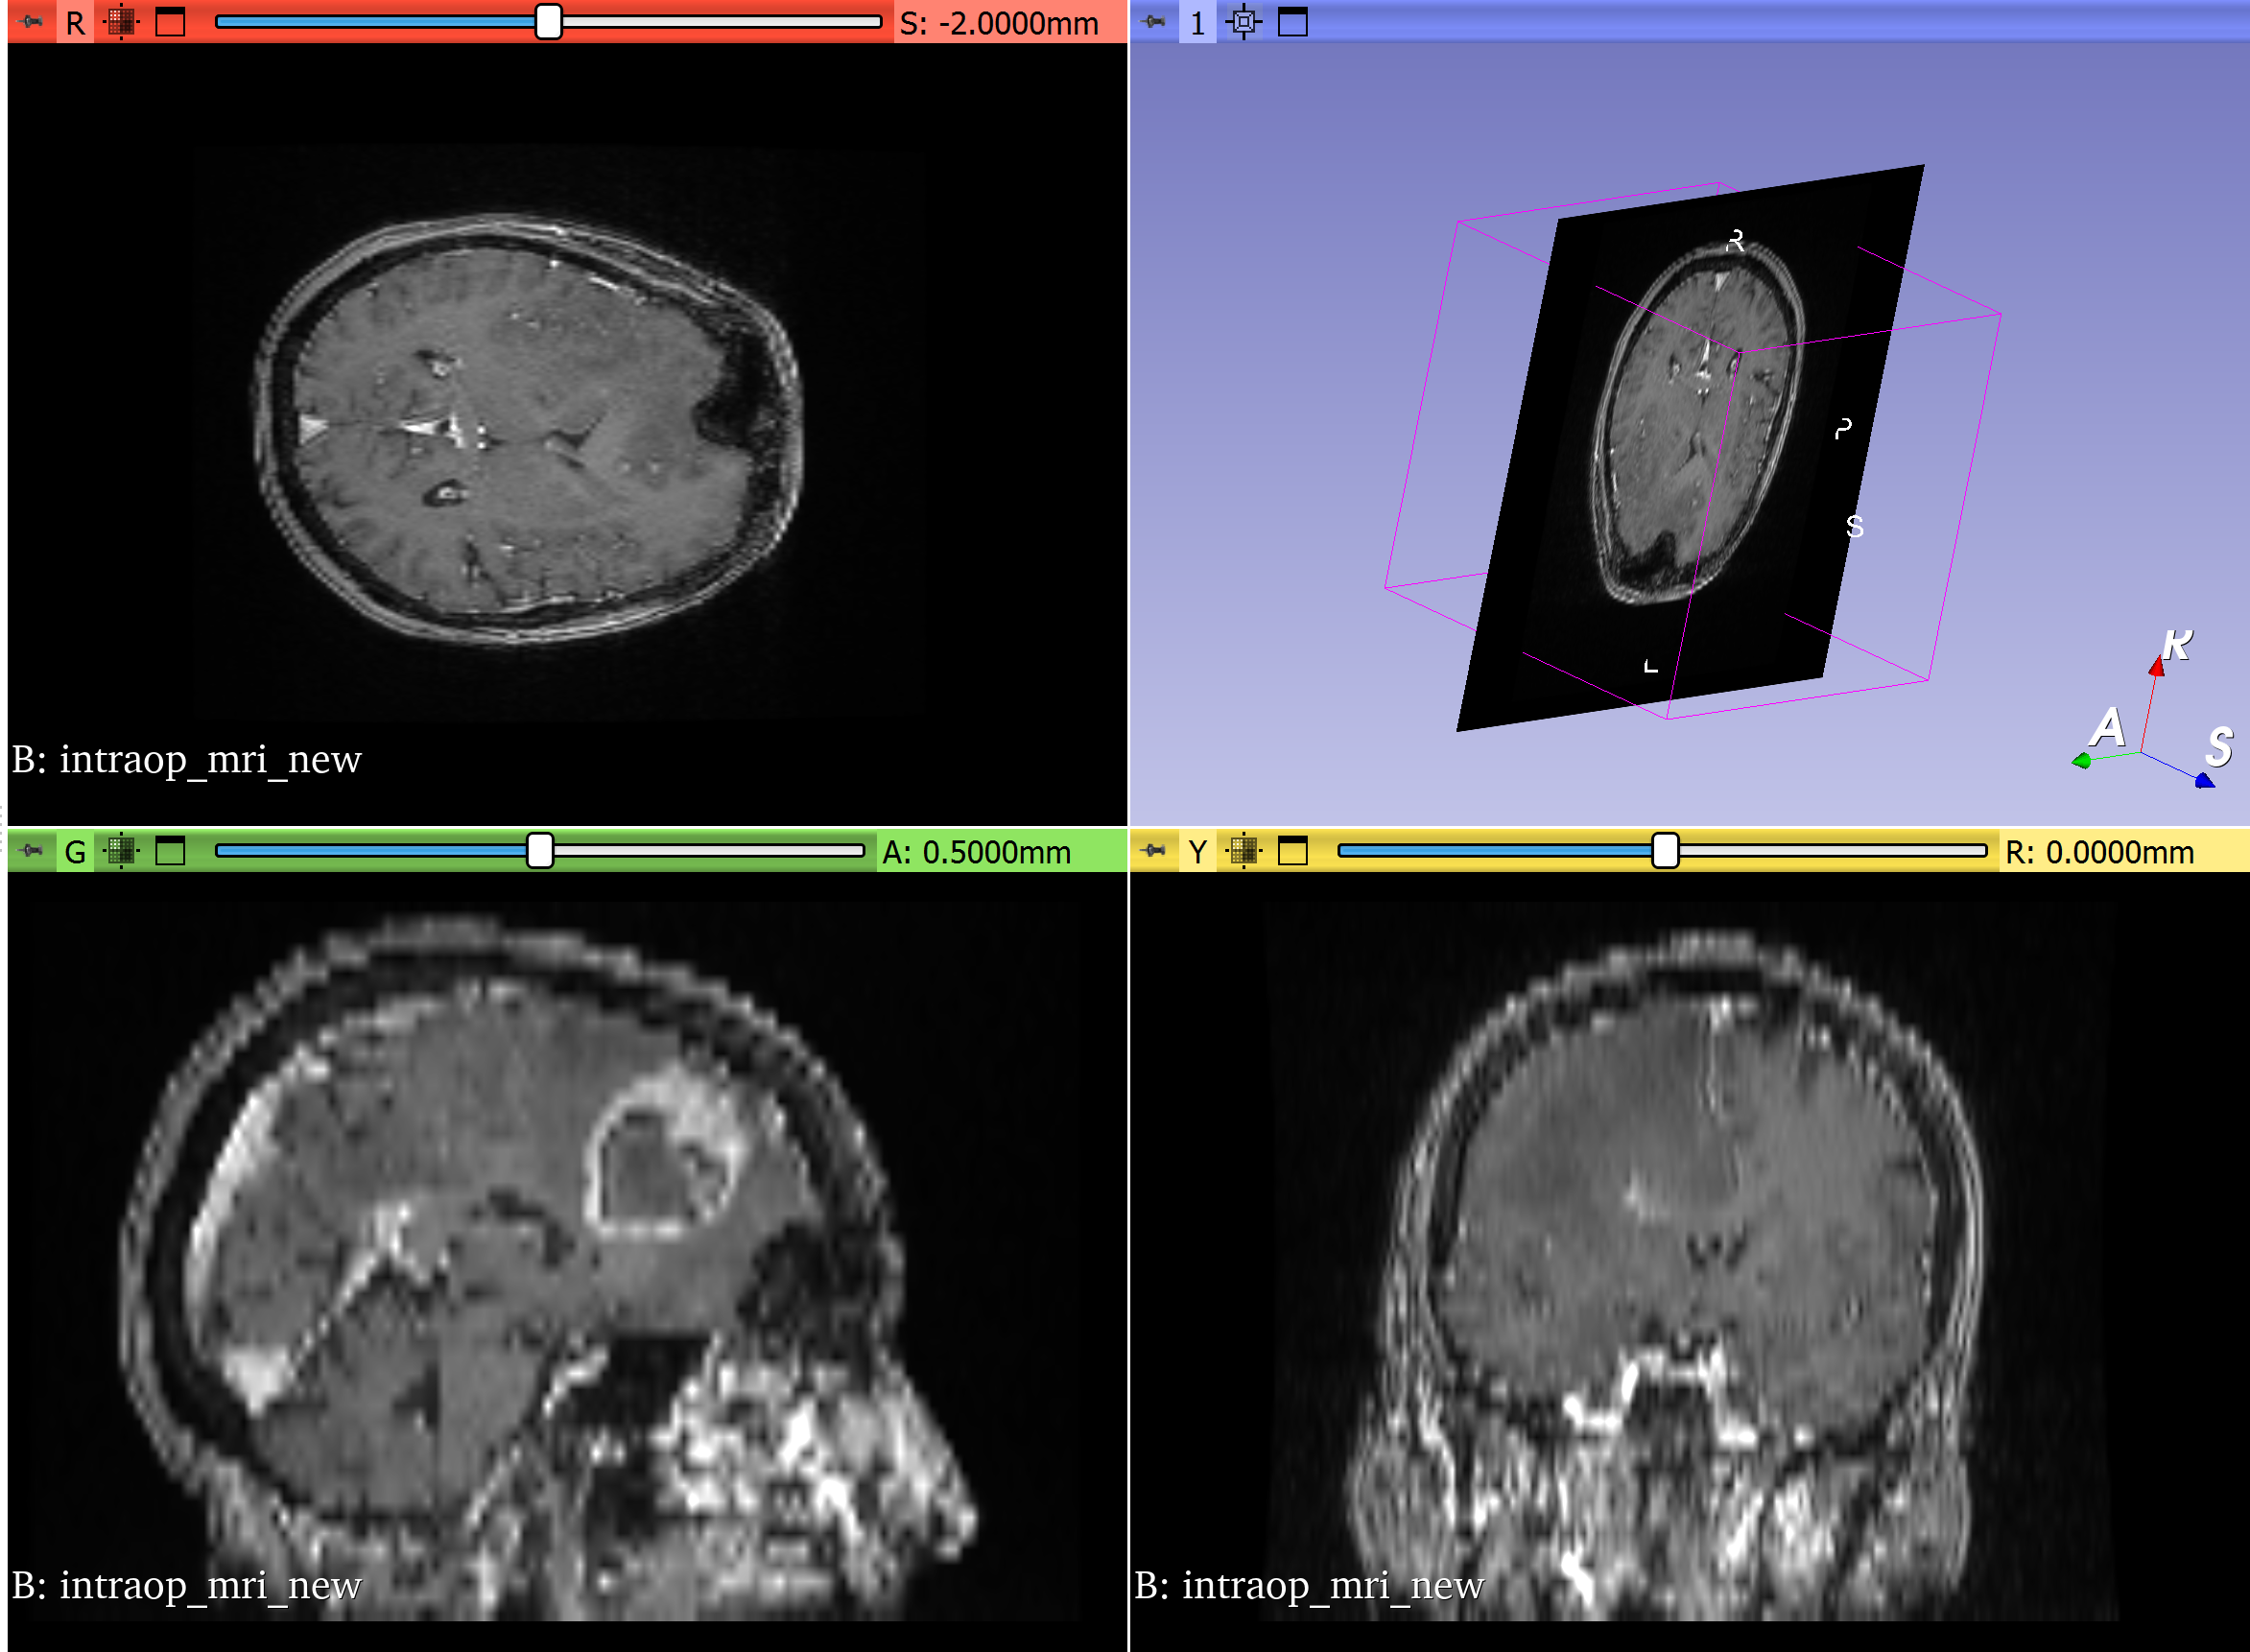

Part 1 b)

i) physical extent is size * spacing ?

ii) 

In [6]:
img.SetOrigin((-140.0, -140.5,-90))
img.SetSpacing((2.0, 1.0, 4.0))
img.TransformIndexToPhysicalPoint((140,280,45))

(140.0, 139.5, 90.0)

compare result

Part 1- c)

In [ ]:
# load data and check the meta data
img_resampled = sitk.ReadImage("C:\\Users\\User\\Documents\\masters-queens\\BMIF804\\assignment 2\\Output Volume.nrrd")

In [ ]:
# set Slicer as external viewer
external_viewer = sitk.ImageViewer()
slicer_app_location = "C:\\Users\\User\\AppData\\Local\\NA-MIC\\Slicer 5.0.3\\Slicer.exe"
external_viewer.SetApplication(slicer_app_location)

external_viewer.Execute(img_resampled)

In [32]:
print('size: ',img_resampled.GetSize())
print('origin: ',img_resampled.GetOrigin())
print('spacing: ',img_resampled.GetSpacing())
print('direction: ',img_resampled.GetDirection())
print('pixel type: ',img_resampled.GetPixelIDTypeAsString())

size:  (560, 560, 360)
origin:  (-140.0, -139.5, -90.0)
spacing:  (0.5, 0.5, 0.5)
direction:  (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
pixel type:  32-bit signed integer


(direction, pixel type) will be similar to the volume prior to upsampling

Part 1) d)

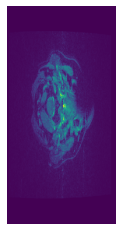

TypeError: in method 'ImageViewer_Execute', argument 2 of type 'itk::simple::Image const &'

In [133]:
def data_resample(img, new_spacing):
    resampled= sitk.ResampleImageFilter()
    resampled.SetOutputSpacing(new_spacing)
    resampled.SetReferenceImage(img)
    resampled.SetOutputPixelType(32)
    return img

new_spacing = [0.5, 0.5, 0.5]
img_resample = data_resample(img[:,:,0],new_spacing)
plt.imshow(sitk.GetArrayFromImage(img_resample))
plt.axis('off')    
plt.show()

#save image
sitk.WriteImage(img_resample, "C:\\Users\\User\\Documents\\masters-queens\\BMIF804\\assignment 2\\img_resample.nrrd")

# set Slicer as external viewer
external_viewer.Execute("C:\\Users\\User\\Documents\\masters-queens\\BMIF804\\assignment 2\\img_resample.nrrd")

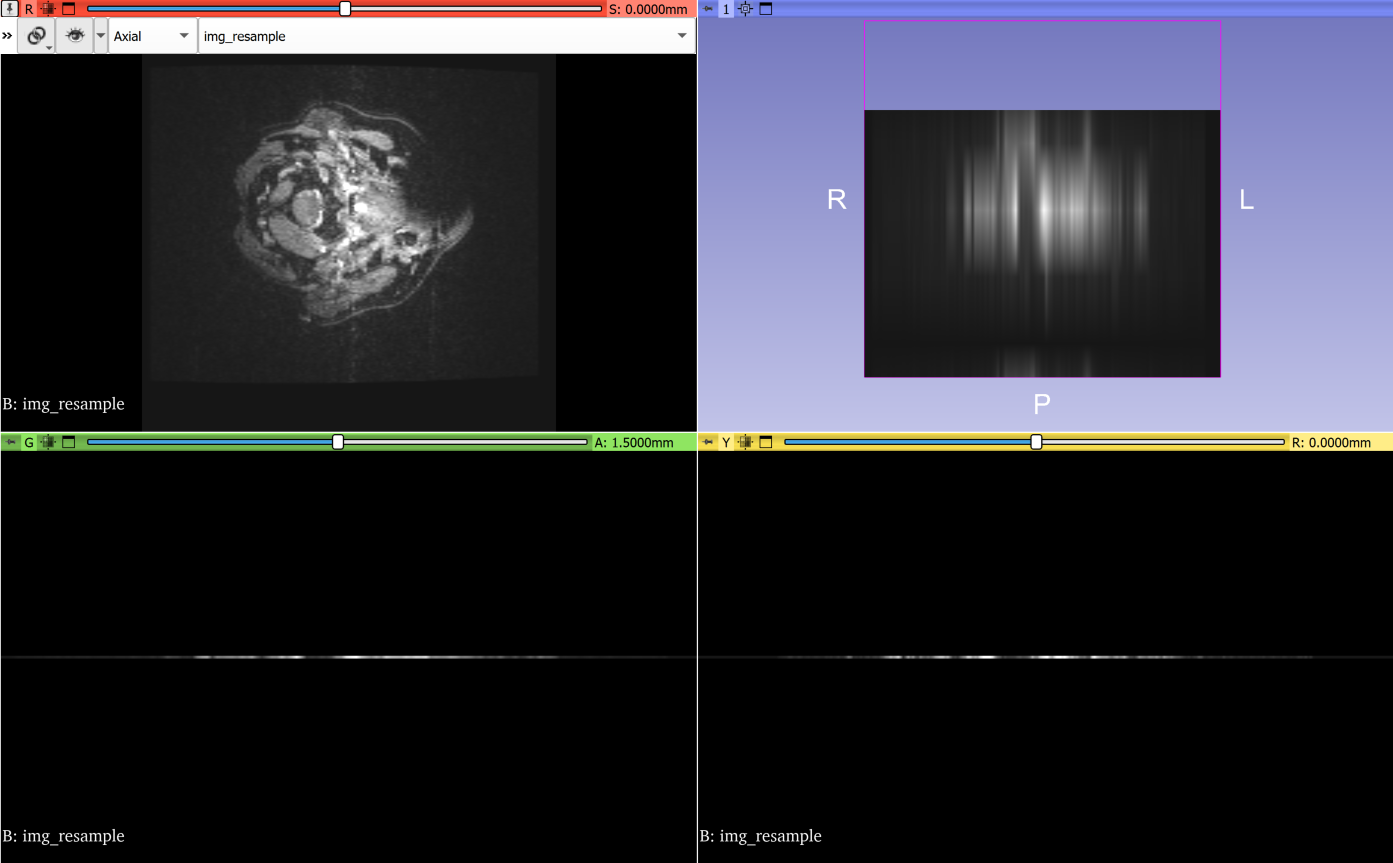

Part 2

In [1]:
# define the Euler transformation
transform  = sitk.Euler3DTransform()

#set center
transform.SetCenter([-6, -12,0]) 

# add rotation around S coordinate (in LP plane)
transform.SetRotation(0,0,np.pi/2)


# apply the transformation to the image object
# we apply the transformation using resample function

img_rotated = sitk.Resample(img, img, transform, sitk.sitkLinear) #(image, reference image, transfomration, interpolation)

plt.subplot(1,2,1)
plt.imshow(sitk.GetArrayFromImage(img[:,:,0]))
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(sitk.GetArrayFromImage(img_rotated[:,:,0]))
plt.axis('off')
plt.show()

NameError: name 'sitk' is not defined

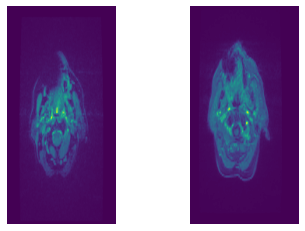

In [86]:
# define the Euler transformation
transform  = sitk.Euler3DTransform()

#set center
#transform.SetCenter([140/2, 280/2, 45/2]) does

# add rotation around S coordinate (in LP plane)
transform.SetTranslation([10,10,10])


# apply the transformation to the image object
# we apply the transformation using resample function

img_transformed = sitk.Resample(img_rotated, img_rotated, transform, sitk.sitkLinear) #(image, reference image, transfomration, interpolation)

plt.subplot(1,2,1)
plt.imshow(sitk.GetArrayFromImage(img_rotated[0:,:,0]))
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(sitk.GetArrayFromImage(img_transformed[0:,:,0]))
plt.axis('off')
plt.show()

other way around